In [1]:
%load_ext autoreload
%autoreload 2

from state import State
from domain import Domain
from swe_operators import SweLinearOperator, SweAdvectiveFormOperator, SweVecInvFormOperator
from time_schemes import rk4
from diffusion import DiffusionOperator, diff2_sbp21
from initial_conditions import gaussian_hill, barotropic_instability, geostrophic_balance
import operators as op
from vizualization import surf_field, imshow_field, animate_imshow, animate_surf

import numpy as np
%matplotlib notebook

In [2]:
# definition of computational domain constants
RADZ = 6371.22 * 1000.0 # "Earth" radii in meters
GRAV = 9.80616 # "Earth" gravity acceleration in m * s**(-2)
OMEGA = 7.292 * 10**(-5) # "Earth" angular velocity in rad * s**(-1)
PCORI = 2 * OMEGA # Coriolis parameter
H_MEAN = 10 * 1000.0 # "Earth" mean atmosphere depth
C_GRAV = np.sqrt(GRAV * H_MEAN) # Gravity wave speed
LX = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]
LY = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]

In [3]:
%%time
import time
from IPython.display import display, clear_output

domain = Domain(xs = 0.0, xe = LX, nx = 128, ys = 0.0, ye = LY, ny = 128)
state = gaussian_hill(domain, H_MEAN)
swe_operator = SweAdvectiveFormOperator(g = GRAV, pcori = 0.5*PCORI, diff_method = op.central_diff4)

T = 5 * 3600 * 24.0
Nt = 1*180*2
dt = T / Nt

states_list = [state]
for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+str(k))
    state = rk4(state, swe_operator, dt, domain)
    states_list.append(state)

'Time step 360'

CPU times: user 11.6 s, sys: 563 ms, total: 12.2 s
Wall time: 11.5 s


<IPython.core.display.Javascript object>


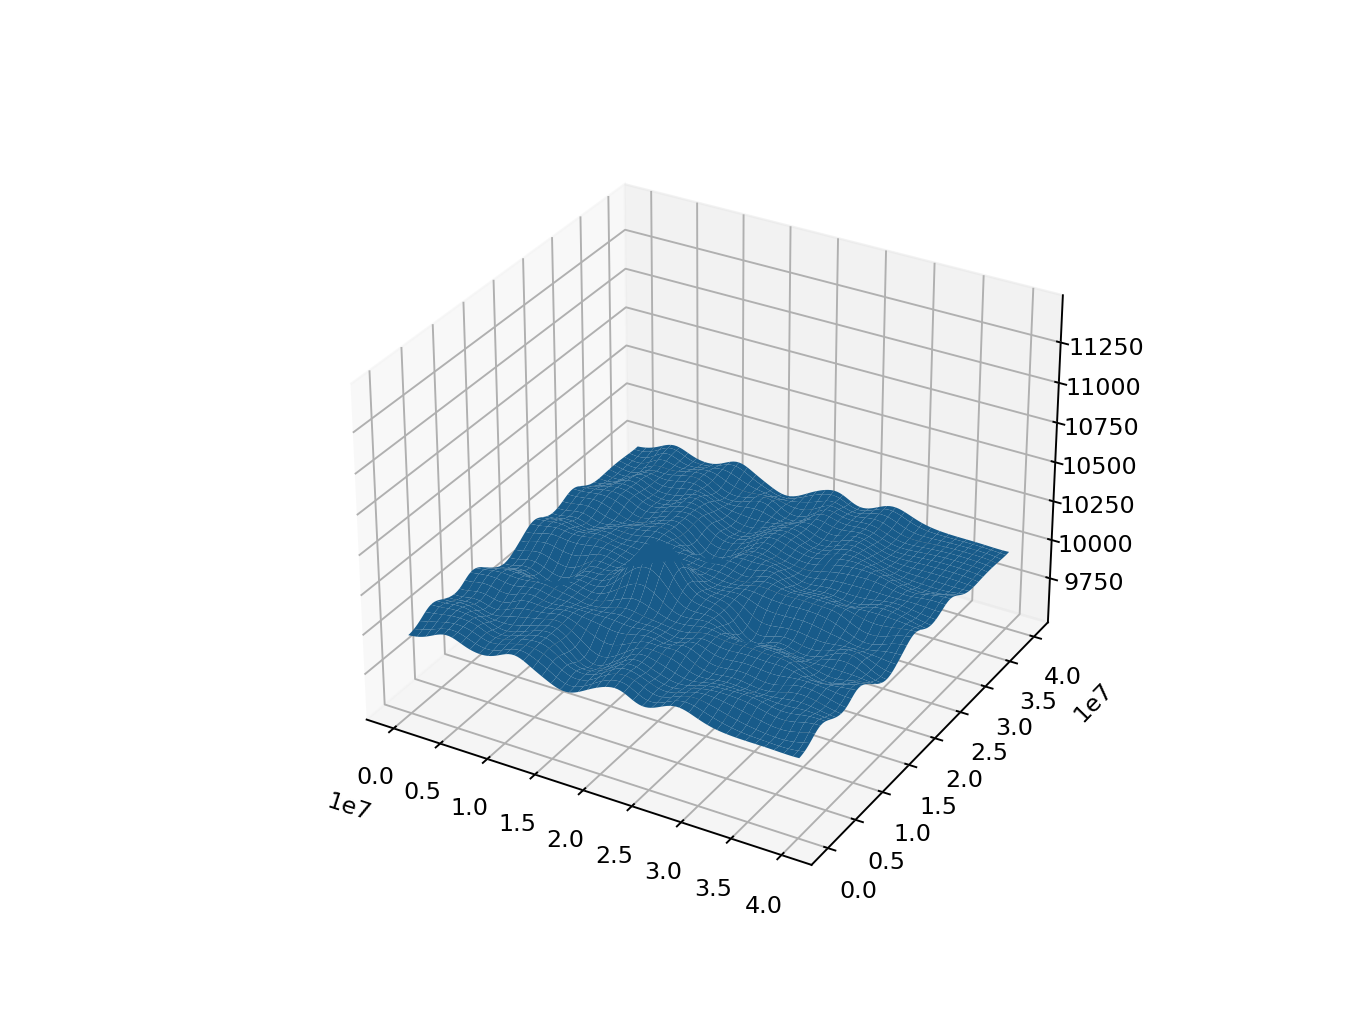

In [4]:
ani = animate_surf([state.h for state in states_list], domain, anim_speed=2)